In [2]:
# lets start with importing necessary library
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels as sm
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt    
import seaborn as sns
import pickle
import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\Product_rating.csv")
data.head()

,Unnamed: 0,Name,Rating,Brand,NO_OF_RATINGS,PRICE
0,0,NIBOSI Chronograph Men's Watch ( Black Dial & ...,4.1 out of 5,-,246 ratings,"₹2,290.00"
1,1,TIMEWEAR Digital Men's Watch,3.8 out of 5,-,"12,814 ratings",₹739.00
2,2,RAW STAR Day and Date Functioning Colored Dial...,-,-,-,₹879.00
3,3,Victorinox Chrono Classic Analog Black Dial Me...,4.4 out of 5,-,27 ratings,"₹38,760.00"
4,4,Gionee STYLFIT GSW6 Smartwatch with Bluetooth ...,-,GIONEE,-,"₹2,999.00"


In [4]:
df=data.Rating

In [5]:
newList = []

progress = True
i = 0;

while (progress):
    progress = False
    sublist = []

    for list in df:
        if len(list) <= i:
            continue
        else:
            sublist.append(list[i])
            progress = True

    if not progress:
        break

    newList.append(sublist)
    i = i+1


print(newList[0])

['4', '3', '-', '4', '-', '4', '3', '3', '3', '3', '3', '4', '3', '3', '4', '3', '4', '3', '4', '2', '3', '3', '5', '3', '-', '2', '3', '3', '3', '3', '2', '4', '2', '3', '3', '3', '3', '4', '3', '3', '3', '3', '4', '3', '3', '3', '2', '3', '4', '3', '3', '3', '4', '4', '3', '5', '3', '2', '-', '4', '4', '4', '4', '4', '3', '-', '-', '3', '3', '3', '3', '4', '3', '3', '4', '4', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '5', '5', '3', '-', '3', '4', '4', '4', '3', '-', '3', '3', '-', '5', '4', '3', '4', '3', '4', '4', '2', '4', '3', '3', '2', '4', '3', '3', '3', '4', '4', '3', '2', '3', '4', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '3', '-', '-', '4', '3', '-', '4', '-', '4', '3', '3', '3', '3', '3', '4', '3', '3', '4', '3', '4', '3', '4', '2', '3', '3', '5', '3', '-', '2', '3', '3', '3', '3', '2', '4', '2', '3', '3', '3', '3', '4', '3', '3', '3', '3', '4', '3', '3', '3', '2', '3', '4', '3', '3', '3', '4', '4', '3', '5', '3', '2', '-', '4', '4', '4', '4', '4', '3', '-',

In [6]:
Rating=newList[0]

In [7]:
data=data.assign(rating=newList[0])

In [8]:
data.head()

,Unnamed: 0,Name,Rating,Brand,NO_OF_RATINGS,PRICE,rating
0,0,NIBOSI Chronograph Men's Watch ( Black Dial & ...,4.1 out of 5,-,246 ratings,"₹2,290.00",4
1,1,TIMEWEAR Digital Men's Watch,3.8 out of 5,-,"12,814 ratings",₹739.00,3
2,2,RAW STAR Day and Date Functioning Colored Dial...,-,-,-,₹879.00,-
3,3,Victorinox Chrono Classic Analog Black Dial Me...,4.4 out of 5,-,27 ratings,"₹38,760.00",4
4,4,Gionee STYLFIT GSW6 Smartwatch with Bluetooth ...,-,GIONEE,-,"₹2,999.00",-


In [9]:
#extract no of ratings only from object data column
data["NO_OF_RATINGS"]=data.NO_OF_RATINGS.str.strip(' ratings')

In [10]:
data['NO_OF_RATINGS'] = data['NO_OF_RATINGS'].str.replace(',', '')

In [11]:
data['NO_OF_RATINGS'] = data['NO_OF_RATINGS'].str.strip()

In [12]:
data.NO_OF_RATINGS

0         246
1       12814
2           -
3          27
4           -
        ...  
1190        1
1191        -
1192      151
1193        -
1194        -
Name: NO_OF_RATINGS, Length: 1195, dtype: object

In [13]:
data['NO_OF_RATINGS']=pd.to_numeric(data['NO_OF_RATINGS'],errors='coerce')

In [14]:
#extract price only from object data column
data["PRICE"]=data.PRICE.str.strip(' ₹')

In [15]:
data['PRICE'] = data['PRICE'].str.replace(',', '')

In [16]:
data['PRICE'] = data['PRICE'].str.strip()

In [17]:
data['PRICE']=pd.to_numeric(data['PRICE'],errors='coerce')

In [18]:
#drop Unnamed and Rating column now
data.drop(columns='Unnamed: 0',inplace=True)

In [19]:
#drop Rating column
data.drop(columns='Rating',inplace=True)

In [20]:
data.head()

,Name,Brand,NO_OF_RATINGS,PRICE,rating
0,NIBOSI Chronograph Men's Watch ( Black Dial & ...,-,246.0,2290.0,4
1,TIMEWEAR Digital Men's Watch,-,12814.0,739.0,3
2,RAW STAR Day and Date Functioning Colored Dial...,-,NaN,879.0,-
3,Victorinox Chrono Classic Analog Black Dial Me...,-,27.0,38760.0,4
4,Gionee STYLFIT GSW6 Smartwatch with Bluetooth ...,GIONEE,NaN,2999.0,-


In [21]:
data.shape

(1195, 5)

data have 3 column and 754 rows 

In [22]:
data.isnull().sum()

Name               0
Brand              0
NO_OF_RATINGS     96
PRICE            348
rating             0
dtype: int64

In [23]:
#convert space into null values
data['Brand']=data['Brand'].replace('-',np.NaN)
data['rating']=data['rating'].replace('-',np.NaN)
data['NO_OF_RATINGS']=data['NO_OF_RATINGS'].replace('-',np.NaN)
data['PRICE']=data['PRICE'].replace('-',np.NaN)

In [24]:
data.head()

,Name,Brand,NO_OF_RATINGS,PRICE,rating
0,NIBOSI Chronograph Men's Watch ( Black Dial & ...,NaN,246.0,2290.0,4
1,TIMEWEAR Digital Men's Watch,NaN,12814.0,739.0,3
2,RAW STAR Day and Date Functioning Colored Dial...,NaN,NaN,879.0,NaN
3,Victorinox Chrono Classic Analog Black Dial Me...,NaN,27.0,38760.0,4
4,Gionee STYLFIT GSW6 Smartwatch with Bluetooth ...,GIONEE,NaN,2999.0,NaN


In [25]:
#impute NaN values
data['Brand']=data['Brand'].fillna(data['Brand'].mode()[0])

In [26]:
data['rating']=data['rating'].fillna(data['rating'].mode()[0])
data['NO_OF_RATINGS']=data['NO_OF_RATINGS'].fillna(data['NO_OF_RATINGS'].mode()[0])
data['PRICE']=data['PRICE'].fillna(data['PRICE'].mean())

In [27]:
data.head()

,Name,Brand,NO_OF_RATINGS,PRICE,rating
0,NIBOSI Chronograph Men's Watch ( Black Dial & ...,Lenovo,246.0,2290.0,4
1,TIMEWEAR Digital Men's Watch,Lenovo,12814.0,739.0,3
2,RAW STAR Day and Date Functioning Colored Dial...,Lenovo,3.0,879.0,4
3,Victorinox Chrono Classic Analog Black Dial Me...,Lenovo,27.0,38760.0,4
4,Gionee STYLFIT GSW6 Smartwatch with Bluetooth ...,GIONEE,3.0,2999.0,4


In [28]:
data.nunique()

Name             295
Brand             65
NO_OF_RATINGS    237
PRICE            159
rating             5
dtype: int64

In [29]:
data['rating']=pd.to_numeric(data['rating'])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           1195 non-null   object 
 1   Brand          1195 non-null   object 
 2   NO_OF_RATINGS  1195 non-null   float64
 3   PRICE          1195 non-null   float64
 4   rating         1195 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 46.8+ KB


In [31]:
data.describe()

,NO_OF_RATINGS,PRICE,rating
count,1195.000000,1195.000000,1195.000000
mean,7778.306276,18321.093447,3.719665
std,21349.073942,18811.578734,0.599475
min,1.000000,72.000000,1.000000
25%,19.000000,4199.000000,3.000000
50%,314.000000,18321.093447,4.000000
75%,2134.000000,18321.093447,4.000000
max,106070.000000,95990.000000,5.000000


In [32]:
data.head()

,Name,Brand,NO_OF_RATINGS,PRICE,rating
0,NIBOSI Chronograph Men's Watch ( Black Dial & ...,Lenovo,246.0,2290.0,4
1,TIMEWEAR Digital Men's Watch,Lenovo,12814.0,739.0,3
2,RAW STAR Day and Date Functioning Colored Dial...,Lenovo,3.0,879.0,4
3,Victorinox Chrono Classic Analog Black Dial Me...,Lenovo,27.0,38760.0,4
4,Gionee STYLFIT GSW6 Smartwatch with Bluetooth ...,GIONEE,3.0,2999.0,4


In [33]:
#encoding categorical data with label encoding 
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder()
for i in data:
    if data[i].dtypes=='object':
         data[i]=ord.fit_transform(data)

In [34]:
data.head()

,Name,Brand,NO_OF_RATINGS,PRICE,rating
0,156.0,156.0,246.0,2290.0,4
1,242.0,242.0,12814.0,739.0,3
2,181.0,181.0,3.0,879.0,4
3,263.0,263.0,27.0,38760.0,4
4,95.0,95.0,3.0,2999.0,4


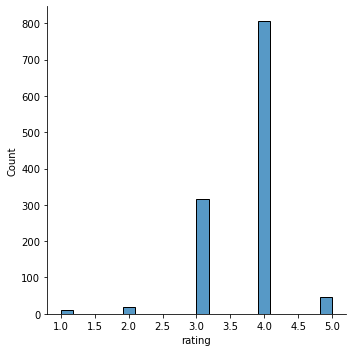

In [35]:
#Visualization of data distribution 

sns.displot(data.rating)

so most of the rating between 3 to 4 on a average

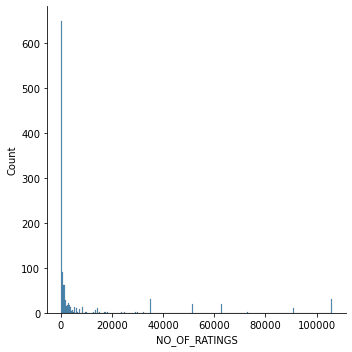

In [36]:
sns.displot(data.NO_OF_RATINGS)

so most of the product have null review and few are 0 to 2000

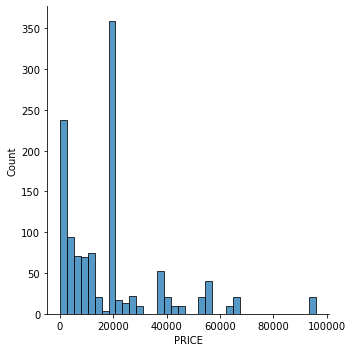

In [37]:
sns.displot(data.PRICE)

selected product price range approx 20k to 1 lack

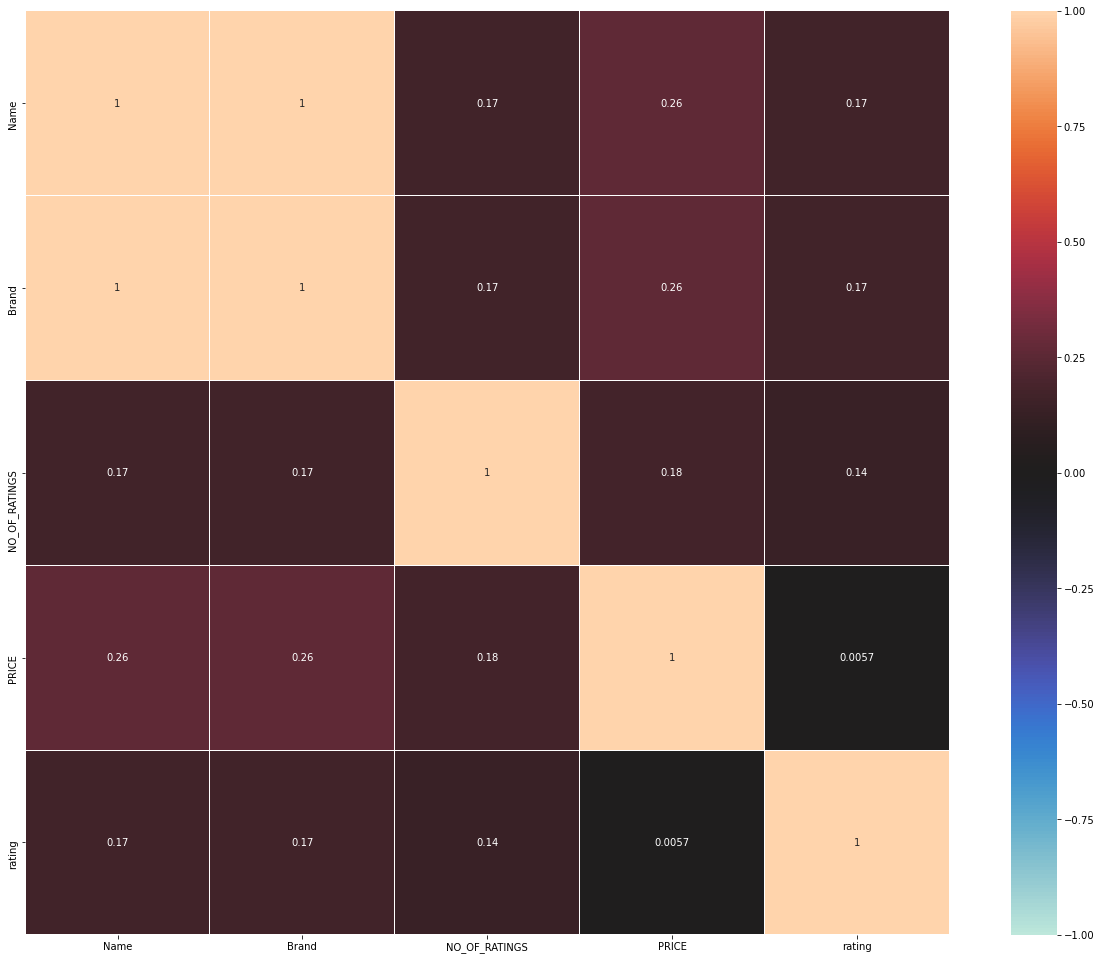

In [38]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=data.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:title={'center':'correlation with target'}>

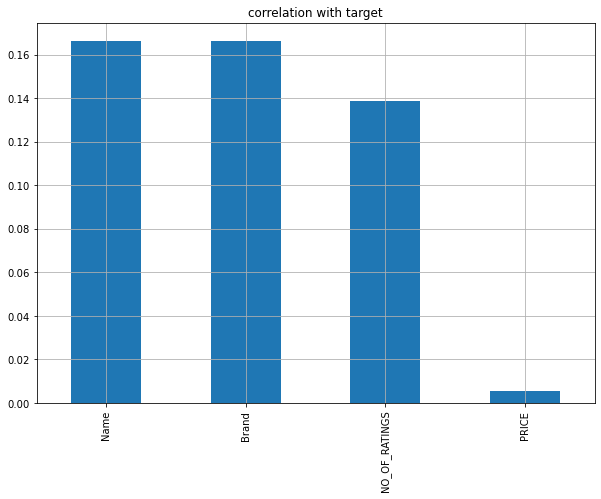

In [39]:
#take same data and visualize the correlation with class 
data.drop('rating',axis=1).corrwith(data.rating).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with target')

yes there is strong correlation with target price shows weak correlation 

# Features Selection

In [40]:
#seprate featurs and label
Y=data.rating
X=data.drop(columns='rating',axis=1)

In [41]:
#Scale the feature data and train test split
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=0.25,random_state=12)

# Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred=Lr.predict(x_test)

In [45]:
#linear model training score
Lr.score(x_train,y_train)

0.043560076945074355

In [46]:
#mean absolute erro
mean_absolute_error(y_pred,y_test)

0.4130451226605979

In [47]:
#model building with Decesion tree 
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
dt.score(x_train,y_train)

1.0

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
cross_val_score(dt,X_scaler,Y,cv=5).mean()

-0.6528457961659851

Hyperparamter tuning of Decision Tree model

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parametrs={'criterion':['mse'],
    'max_depth':range(1,20,2),
    'min_samples_split':range(2,16, 2),
    'min_samples_leaf':range(1,10,1),
    'min_weight_fraction_leaf':[0.01,0.02,0.1,1]}

In [54]:
grid_search=GridSearchCV(estimator=dt,param_grid=parametrs,cv=5)

In [55]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 16, 2),
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.1, 1]})

In [56]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 17,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01}

In [57]:
dt=DecisionTreeRegressor(criterion='mse',
                         max_depth=3,min_samples_leaf=8,min_samples_split=2,min_weight_fraction_leaf=0.01)

In [58]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=8,
                      min_weight_fraction_leaf=0.01)

In [59]:
dt.score(x_train,y_train)

0.27878670403646055

In [60]:
y_pred=dt.predict(x_test)

In [61]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))   

**** accuracy post tuning****
0.21247531032143008


In [62]:
cross_val_score(dt,X_scaler,Y,cv=7).mean()

-0.18153340576335833

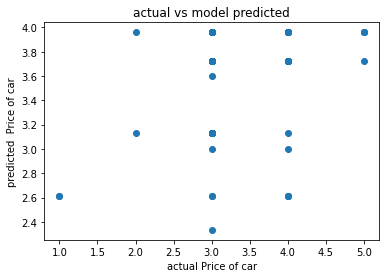

In [209]:
#Visualization of actual vs predicted rating
plt.scatter(y_test,y_pred)
plt.xlabel('actual rating')
plt.ylabel('predicted  rating')
plt.title('actual vs model predicted')
plt.show()

# Gradient Boosting Regression Model

In [228]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [229]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [230]:
#check model score
gbr.score(x_train,y_train)

0.8001886393709171

In [233]:
y_pred=gbr.predict(x_train)

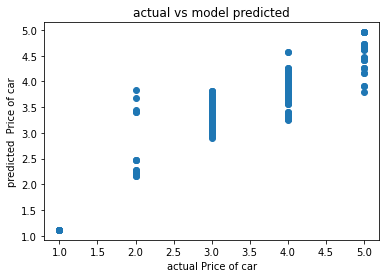

In [234]:
#Visualization of actual vs predicted rating
plt.scatter(y_train,y_pred)
plt.xlabel('actual rating')
plt.ylabel('predicted  rating')
plt.title('actual vs model predicted')
plt.show()

In [215]:
cross_val_score(gbr,X_scaler,Y,cv=5).mean()

-0.1575600777248799

model is underfit but as per sactter plot seems not good lets tune the model

In [216]:
param={'loss':['ls'],
    'learning_rate':[0.1,0.2,0.3,0.4],
    'n_estimators':[100,150,200,250],
    'subsample':[1.0,2,3,4,7],
    'criterion':['friedman_mse']}

In [217]:
grid_search=GridSearchCV(estimator=gbr,param_grid=param,cv=5)

In [218]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4], 'loss': ['ls'],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [1.0, 2, 3, 4, 7]})

In [219]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.4,
 'loss': 'ls',
 'n_estimators': 150,
 'subsample': 1.0}

In [220]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.2, loss='ls',n_estimators=200,subsample=1)

In [221]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=200, subsample=1)

In [222]:
gbr.score(x_train,y_train)

0.9836155196903433

score improved after tuning the model

In [223]:
y_pred=gbr.predict(x_train)

In [224]:
cross_val_score(gbr,X_scaler,Y,cv=5).mean()

0.036831469162254035

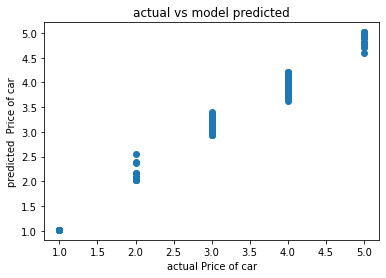

In [226]:
#Visualization of actual vs predicted price after tuning
plt.scatter(y_train,y_pred)
plt.xlabel('actual rating')
plt.ylabel('predicted  rating')
plt.title('actual vs model predicted')
plt.show()

# RandomForest Regression model

In [63]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [64]:
y_pred=rfr.predict(x_train)

In [65]:
rfr.score(x_train,y_train)

0.9798608978458513

In [66]:
cross_val_score(rfr,X_scaler,Y,cv=5).mean()

0.02837670374790493

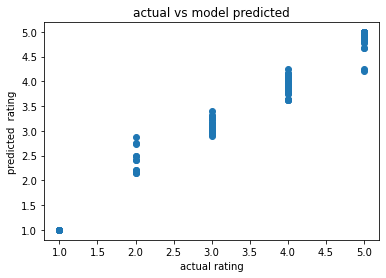

In [67]:
#Visualization of actual vs predicted rating
plt.scatter(y_train,y_pred)
plt.xlabel('actual rating')
plt.ylabel('predicted  rating')
plt.title('actual vs model predicted')
plt.show()

# Hyperparameter Tuning of RandomForestRegression model

In [68]:
param_grid = {  'bootstrap': [True],
              'max_depth': [5, 10, 15], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [69]:
grid=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=5,n_jobs=-1)

In [70]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [71]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 12}

In [72]:
regr=RandomForestRegressor(bootstrap=True,max_depth=15,max_features='log2',n_estimators=13)

In [73]:
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=13)

In [74]:
regr.score(x_train,y_train)

0.9674846531336186

In [75]:
y_pred=regr.predict(x_train)

In [76]:
cross_val_score(regr,X_scaler,Y,cv=5).mean()

0.05552701769243131

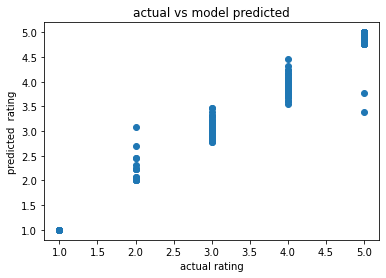

In [77]:
#Visualization of actual vs predicted rating
plt.scatter(y_train,y_pred)
plt.xlabel('actual rating')
plt.ylabel('predicted  rating')
plt.title('actual vs model predicted')
plt.show()

In [78]:
#saving model AdaBoost model
import pickle
file='pikle_ada_model'
with open(file ,'wb') as file:
    pickle.dump(rfr, file)